# Deep and Reinforcement Learning 2024/2025 (M.IA003), FEUP/FCUP

## Deep Learning Project 
## **Develop deep learning discriminative and generative models, applied to the context of “deep fakes”**

work done by:
- Michal Kowalski up
- Pedro Pereira up
- Pedro Azevedo up201905966

## 1.1) Import Necessary

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import os
import glob
from _model import *
from tensorflow.keras.models import load_model
import json


print(tf.config.list_physical_devices('GPU'))
# tf.keras.mixed_precision.set_global_policy('mixed_float16')

2025-03-19 03:37:12.785169: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742355433.408659   37794 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742355433.587581   37794 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742355435.344370   37794 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742355435.344403   37794 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742355435.344405   37794 computation_placer.cc:177] computation placer alr

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
# Define dataset directories
data_dir = "data"
real_dir = os.path.join(data_dir, "real")
fake_dir = os.path.join(data_dir, "fake")

## 1.2) Basic EDA

In [13]:
from _eda import base_stats

base_stats(real_dir, fake_dir)


Real Images Summary:
Total images: 30000
Formats: Counter({'JPEG': 30000})
Color Modes: Counter({'RGB': 30000})
Top 5 Sizes: [((64, 64), 30000)]

Fake Images Summary:
Total images: 30000
Formats: Counter({'JPEG': 30000})
Color Modes: Counter({'RGB': 30000})
Top 5 Sizes: [((64, 64), 30000)]


## 1.3) File Standardization 

In [21]:
from _preprocess import standardize_files

standardize_files('data/real', (128, 128), '128')
standardize_files('data/fake', (128, 128), '128')

data/real/808_1899-08-13_1955.jpg
data/real/10000217_1981-05-05_2009.jpg
data/real/10000548_1925-04-04_1964.jpg
data/real/100012_1948-07-03_2008.jpg
data/real/10001965_1930-05-23_1961.jpg
data/real/10002116_1971-05-31_2012.jpg
data/real/10002702_1960-11-09_2012.jpg
data/real/100039_1904-12-07_1982.jpg
data/real/10004122_1982-03-17_2011.jpg
data/real/10004299_1908-08-19_1950.jpg
data/real/10005947_1981-04-07_2006.jpg
data/real/10007577_1988-06-16_2007.jpg
data/real/100097_1968-03-23_2010.jpg
data/real/1001231_1981-01-30_2014.jpg
data/real/10012532_1983-03-30_2011.jpg
data/real/1001319_1920-11-30_1950.jpg
data/real/100131_1926-09-06_1986.jpg
data/real/1001441_1978-06-24_2005.jpg
data/real/10014795_1968-10-11_2010.jpg
data/real/100156_1920-04-07_1988.jpg
data/real/10016074_1987-07-27_2012.jpg
data/real/10017169_1985-01-20_2009.jpg
data/real/10017464_1973-08-03_2007.jpg
data/real/10019295_1978-04-09_2009.jpg
data/real/10024005_1955-12-24_2012.jpg
data/real/1002427_1966-05-28_2000.jpg
data/

In [3]:
real_dir = os.path.join(data_dir, "real_normalized_128")
fake_dir = os.path.join(data_dir, "fake_normalized_128")

In [ ]:
from _eda import base_stats

base_stats(real_dir, fake_dir)

## 1.4) Baseline

In [4]:
gan = build_gan(schedule=True)

/mnt/c/Users/pedro azevedo/Documents/MIA/ACPR/Discriminative-Generative-Models-ACPR-/.venv2/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1742355462.589371   37794 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7537 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:0b:00.0, compute capability: 8.6
/mnt/c/Users/pedro azevedo/Documents/MIA/ACPR/Discriminative-Generative-Models-ACPR-/.venv2/lib/python3.12/site-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [5]:
gan.summary()

Model: "gan"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 64, 64, 3)      │     1,110,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,110,752 (4.24 MB)

 Trainable params: 1,094,176 (4.17 MB)

 Non-trainable params: 16,576 (64.75 KB)

In [5]:

batch_size = 256
# Get all image file paths

def save_paths(path_list, fname):
    with open(fname, "w") as final:
	    json.dump(path_list, final)

# Define the preprocessing function
def load_and_preprocess(image_path):
    # Read the image file
    image = tf.io.read_file(image_path)

    # Decode the JPEG image
    image = tf.image.decode_jpeg(image, channels=3)

    # Normalize the image to the range [-1, 1]
    image = (tf.cast(image, tf.float32) / 127.5) - 1.0

    return image

def load_paths(train_file, test_file):
    with open(train_file, "r") as train:
        train_paths = json.load(train)
    with open(test_file, "r") as test:
        test_paths = json.load(test)
    return train_paths, test_paths

# image_paths = glob.glob("./data/real_normalized_64/*.jpg")
# train_paths = image_paths[:25000]
# test_paths = image_paths[25000:]
# save_paths(train_paths, 'train.json')
# save_paths(test_paths, 'test.json')

train_paths, test_paths = load_paths('./train.json', './test.json')

# Create the dataset
dataset = tf.data.Dataset.from_tensor_slices(train_paths)
dataset = dataset.map(load_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
dataset = dataset.shuffle(buffer_size=1000).batch(batch_size//2, drop_remainder=True).prefetch(tf.data.AUTOTUNE)

In [24]:
d.summary()

NameError: name 'd' is not defined

In [6]:
gan.generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8192)           │       819,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 8192)           │        32,768 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 32)     │        51,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 3)      │         2,400 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,110,752 (4.24 MB)

 Trainable params: 1,094,176 (4.17 MB)

 Non-trainable params: 16,576 (64.75 KB)

In [7]:
from PIL import Image

# Get a sorted list of files in the folder
real_images_path_list = sorted(os.listdir(real_dir))

def get_n_real_img(n):
    # Check if the n-th image exists
    if n < len(real_images_path_list):
        image_path = os.path.join(real_dir, real_images_path_list[n])
        image = Image.open(image_path)
        image.show()  # Display the image
        return image
    else:
        print(f"The folder contains only {len(real_images_path_list)} images. Unable to access the {n}-th image.")
        Exception


In [8]:
real_dir

'data/real_normalized_128'

In [9]:
from _fid import *
from numpy import random

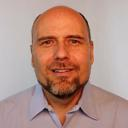

I0000 00:00:1742355466.674751   37794 cuda_dnn.cc:529] Loaded cuDNN version 90300


(array([0.29005396, 0.        , 0.        , ..., 0.        , 0.        ,
        3.6111925 ], dtype=float32),
 array(1.12578592))

In [10]:
fid = FID(None, input_shape = (128,128,3))

n_ramdom = random.randint(30000)
fid.get_real_features(get_n_real_img(n_ramdom))

In [11]:
from _model import train_gan

d_losses, e_losses = train_gan(gan, dataset, epochs=100, batch_size=batch_size, fid_ok=True, fid_e_size=20, fid_eval=fid)

Epoch 0, D Loss: 0.5554283857345581, G Loss: 1.967442274093628


ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [9]:
gan.save('my_gan.keras')

/mnt/c/Users/pedro azevedo/Documents/MIA/ACPR/Discriminative-Generative-Models-ACPR-/.venv2/lib/python3.12/site-packages/keras/src/saving/saving_api.py:107: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  return saving_lib.save_model(model, filepath)


In [ ]:
final_d_losses = [float(x) for x in d_losses]
final_g_losses = [float(x) for x in e_losses]
with open('d_losses.json', "w") as f:
    json.dump(final_d_losses, f)

with open('g_losses.json', "w") as f:
    json.dump(final_g_losses, f)

# 1.5) Load Model

In [12]:
gan = load_model('./my_gan.keras')

# go = tf.keras.optimizers.Adam(1e-4)
# do = tf.keras.optimizers.Adam(1e-4)

TypeError: Could not locate class 'GAN'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': '_model', 'class_name': 'GAN', 'config': {'trainable': True, 'dtype': {'module': 'keras', 'class_name': 'DTypePolicy', 'config': {'name': 'float32'}, 'registered_name': None}}, 'registered_name': 'GAN', 'compile_config': {'optimizer': {'module': 'keras.optimizers', 'class_name': 'RMSprop', 'config': {'name': 'rmsprop', 'learning_rate': 0.0010000000474974513, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'rho': 0.9, 'momentum': 0.0, 'epsilon': 1e-07, 'centered': False}, 'registered_name': None}, 'loss': None, 'loss_weights': None, 'metrics': None, 'weighted_metrics': None, 'run_eagerly': False, 'steps_per_execution': 1, 'jit_compile': True}}

In [ ]:
d_losses, e_losses = train_gan(dataset, d, g, do, go, epochs=200, batch_size=batch_size)

# test run fiq